# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [2]:
# General tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

# Classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier, RidgeClassifierCV, Lasso, LassoCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Data Exploration & Visualization

In [3]:
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(9557, 143)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## **Categories of variables**

- **Target** (income response variable)
- Identifiers
- Family
- Age
- Sex
- Education
- Marriage Status
- Disability
- Region
- Property Information (rent/rooms/size/occupants/own-or-rent)
- Appliances/Utilites
- Electronics
- Property Build
- Intersection Groups
- Squares

## Explanatory Variables
  
(Details are in **variable_descriptions.ipynb**)

### Identifiers

Variable | Desc.
--- | ---
Id | Unique identifier for each row
idhogar | Unique identifier for each household
parentesco1 | Indicates if this person is the head of the household

### Family

Variable | Desc.
--- | ---
parentesco1 | =1 if household head
parentesco2 | =1 if spouse/partner
parentesco3 | =1 if son/doughter
parentesco4 | =1 if stepson/doughter
parentesco5 | =1 if son/doughter in law
parentesco6 | =1 if grandson/doughter
parentesco7 | =1 if mother/father
parentesco8 | =1 if father/mother in law
parentesco9 | =1 if brother/sister
parentesco10 | =1 if brother/sister in law
parentesco11 | =1 if other family member
parentesco12 | =1 if other non family member

### Age

Variable | Desc.
--- | ---
estadocivil1 | =1 if less than 10 years old
age | Age in years

### Sex

Variable | Desc.
--- | ---
male | =1 if male
female | =1 if female

### Education

Variable | Desc.
--- | ---
escolari | years of schooling
rez_esc | Years behind in school
instlevel1 | =1 no level of education
instlevel2 | =1 incomplete primary
instlevel3 | =1 complete primary
instlevel4 | =1 incomplete academic secondary level
instlevel5 | =1 complete academic secondary level
instlevel6 | =1 incomplete technical secondary level
instlevel7 | =1 complete technical secondary level
instlevel8 | =1 undergraduate and higher education
instlevel9 | =1 postgraduate higher education

### Marriage Status

Variable | Desc.
--- | ---
estadocivil2 | =1 if free or coupled uunion
estadocivil3 | =1 if married
estadocivil4 | =1 if divorced
estadocivil5 | =1 if separated
estadocivil6 | =1 if widow/er
estadocivil7 | =1 if single

### Disability

Variable | Desc.
--- | ---
dis | =1 if disable person

### Region

Variable | Desc.
--- | ---
lugar1 | =1 region Central
lugar2 | =1 region Chorotega
lugar3 | =1 region PacÃƒÂ­fico central
lugar4 | =1 region Brunca
lugar5 | =1 region Huetar AtlÃƒÂ¡ntica
lugar6 | =1 region Huetar Norte
area1 | =1 zona urbana
area2 | =2 zona rural

### Property Information
#### Pertaining to Rent / Rooms / Size / Occupants / Crowding / Own-or-Rent)

Variable | Desc.
--- | ---
v2a1 | Monthly rent payment
hacdor | =1 Overcrowding by bedrooms
rooms |  number of all rooms in the house
hacapo | =1 Overcrowding by rooms
v14a | =1 has bathroom in the household
r4t3 | Total persons in the household
tamhog | size of the household
tamviv | number of persons living in the household
hhsize | household size
hogar_nin | Number of children 0 to 19 in household
hogar_adul | Number of adults in household
hogar_mayor | # of individuals 65+ in the household
hogar_total | # of total individuals in the household
dependency | Dependency rate (# young and old / working age)
bedrooms | number of bedrooms
overcrowding | # persons per room
tipovivi1 | =1 own and fully paid house
tipovivi2 | =1 own,  paying in installments
tipovivi3 | =1 rented
tipovivi4 | =1 precarious
tipovivi5 | =1 other(assigned,  borrowed)

### Appliances/Utilites

Variable | Desc.
--- | ---
abastaguadentro | =1 if water provision inside the dwelling
abastaguafuera | =1 if water provision outside the dwelling
abastaguano | =1 if no water provision
public | "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
planpri | =1 electricity from private plant
noelec | =1 no electricity in the dwelling
coopele | =1 electricity from cooperative
sanitario1 | =1 no toilet in the dwelling
sanitario2 | =1 toilet connected to sewer or cesspool
sanitario3 | =1 toilet connected to  septic tank
sanitario5 | =1 toilet connected to black hole or letrine
sanitario6 | =1 toilet connected to other system
energcocinar1 | =1 no main source of energy used for cooking (no kitchen)
energcocinar2 | =1 main source of energy used for cooking electricity
energcocinar3 | =1 main source of energy used for cooking gas
energcocinar4 | =1 main source of energy used for cooking wood charcoal
elimbasu1 | =1 if rubbish disposal mainly by tanker truck
elimbasu2 | =1 if rubbish disposal mainly by botan hollow or buried
elimbasu3 | =1 if rubbish disposal mainly by burning
elimbasu4 | =1 if rubbish disposal mainly by throwing in an unoccupied space
elimbasu5 | "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
elimbasu6 | =1 if rubbish disposal mainly other
refrig | =1 if the household has refrigerator

### Electronics

Variable | Desc.
--- | ---
v18q | owns a tablet
v18q1 | number of tablets household owns
computer | =1 if the household has notebook or desktop computer
television | =1 if the household has TV
mobilephone | =1 if mobile phone
qmobilephone | # of mobile phones

### Property Build

Variable | Desc.
--- | ---
paredblolad | =1 if predominant material on the outside wall is block or brick
paredzocalo | "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
paredpreb | =1 if predominant material on the outside wall is prefabricated or cement
pareddes | =1 if predominant material on the outside wall is waste material
paredmad | =1 if predominant material on the outside wall is wood
paredzinc | =1 if predominant material on the outside wall is zink
paredfibras | =1 if predominant material on the outside wall is natural fibers
paredother | =1 if predominant material on the outside wall is other
pisomoscer | "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
pisocemento | =1 if predominant material on the floor is cement
pisoother | =1 if predominant material on the floor is other
pisonatur | =1 if predominant material on the floor is  natural material
pisonotiene | =1 if no floor at the household
pisomadera | =1 if predominant material on the floor is wood
techozinc | =1 if predominant material on the roof is metal foil or zink
techoentrepiso | "=1 if predominant material on the roof is fiber cement,  mezzanine "
techocane | =1 if predominant material on the roof is natural fibers
techootro | =1 if predominant material on the roof is other
cielorazo | =1 if the house has ceiling
epared1 | =1 if walls are bad
epared2 | =1 if walls are regular
epared3 | =1 if walls are good
etecho1 | =1 if roof are bad
etecho2 | =1 if roof are regular
etecho3 | =1 if roof are good
eviv1 | =1 if floor are bad
eviv2 | =1 if floor are regular
eviv3 | =1 if floor are good

### Intersection Groups
#### Provided variables consisting of multiple categories

Variable | Desc.
--- | ---
r4h1 | Males younger than 12 years of age
r4h2 | Males 12 years of age and older
r4m1 | Females younger than 12 years of age
r4m2 | Females 12 years of age and older
r4t1 | persons younger than 12 years of age
r4t2 | persons 12 years of age and older
r4h3 | Total males in the household
r4m3 | Total females in the household
edjefe | years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa | years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
meaneduc | average years of education for adults (18+)

### Squares

Variable | Desc.
--- | ---
SQBescolari | escolari squared
SQBage | age squared
SQBhogar_total | hogar_total squared
SQBedjefe | edjefe squared
SQBhogar_nin | hogar_nin squared
SQBovercrowding | overcrowding squared
SQBdependency | dependency squared
SQBmeaned | square of the mean years of education of adults (>=18) in the household
agesq | Age squared

## Response Variable (Target)
### Income Level 
(1 = extreme poverty, 4 = non-vulnerable)

Text(0.5, 1.0, 'Poverty Level Counts')

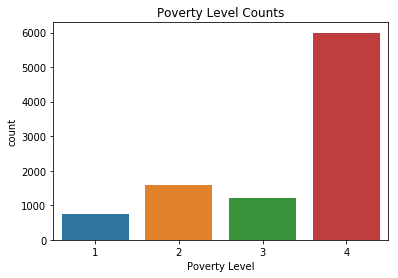

In [4]:
countByTarget = df.groupby(df.Target).count().Id

sns.countplot(df.Target)
plt.xlabel("Poverty Level")
plt.title("Poverty Level Counts")

## Property Information

### Number of Households

In [5]:
df.groupby(df.idhogar).count().shape[0]

2988

### Heads of Households

In [6]:
df.parentesco1.sum()

2973

### Monthly Rent

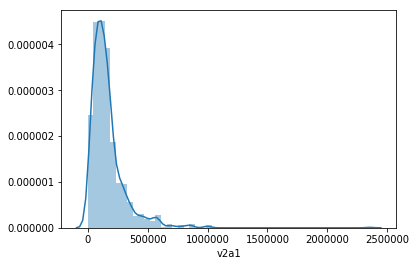

In [7]:
# Proportion of NaN values
df.v2a1.isna().sum() / len(df.v2a1)

sns.distplot(df.v2a1.dropna())

## Covariance

## Tranformations

# Cleaning

## Missing Values

In [8]:
# 5 columns with NaN values
cols_nan = list(df.columns[df.isna().any()])
cols_nan

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [9]:
# Total number of missing values
df[cols_nan].isna().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [10]:
# Proportion of missing values
df[cols_nan].isna().sum() / df.shape[0]

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

## Approach

Three features have very large number of missing values (72-83%).

### **v2a1** (*monthly rent payment*)  

It seems that for every household with missing values, all individuals have no rent value.  What about creating a household dataframe and filling those values based on our selected classification? The field will be dropped and revisited once a model is selected.

In [11]:
# See if any members of household have rental value if there is a NaN for rent in household
any_nan = df.groupby('idhogar')['v2a1'].apply(lambda x: np.isnan(x).any()).mean() 
all_nan = df.groupby('idhogar')['v2a1'].apply(lambda x: np.isnan(x).all()).mean()
any_nan - all_nan

0.0

In [12]:
df.drop('v2a1', axis=1, inplace=True)

### **v18q1** (*number of tablets in household*)  

Again, households with missing values contained missing values for all individuals, so we will set those to 0.

In [13]:
any_nan = df.groupby('idhogar')['v18q'].apply(lambda x: np.isnan(x).any()).mean() 
all_nan = df.groupby('idhogar')['v18q'].apply(lambda x: np.isnan(x).all()).mean()
any_nan - all_nan

0.0

In [14]:
df.v18q1.fillna(0, inplace=True)
df.head()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### **rez_esc** (*years behind in school*)  

Without domain knowledge in how to replace this data, field is dropped.

In [15]:
df.drop("rez_esc", axis=1, inplace=True)

### **meaneduc** (*avg years education for adults (18+)*)

Will take mean of mean education level for adults in household and apply to these individuals.  

In [16]:
educ_by_household = df[df.age >= 18].groupby('idhogar')['escolari'].mean()

def missing_educ(x, SQ=False):
    
    if SQ == False:
        col = 'meaneduc'
    else:
        col = 'SQBmeaned'
        
    # Find missing value ids
    missing_ids = x[x[col].isna()][col].keys()
    
    # Iterate over missing values and set them to correct value
    for i in missing_ids:
        if SQ == False:
            household = x.loc[i, 'idhogar']
            x.loc[i, col] = educ_by_household[household]
        else:
            avg = x.loc[i, 'meaneduc']
            x.loc[i, col] = avg ** 2
            
    return x
        
df = missing_educ(df)
df.meaneduc.isna().sum()

0

### **SQBmeaned** (*meaneduc squared*)

Will square value found from **meaneduc**

In [17]:
df = missing_educ(df, SQ=True)
df.SQBmeaned.isna().sum()

0

### Result

In [18]:
# Total number of missing values
df.isna().sum().sum()

0

## Miscellaneous

### edjefe / edjefa / dependency

These columns have the following potential values:  
- *yes*
- *no*
- *float*
  
These variables will be dropped until we understanding how the variables are setup (not clear from the kaggle competition).

In [19]:
print("Columns before:", df.shape[1])
df = df.drop(columns=['edjefe', 'edjefa', 'dependency'])
print("Columns after:", df.shape[1])

Columns before: 141
Columns after: 138


### Squared Values

Here we setup our dataframe to either include only non-squared features, only squared features, or both.

(*this is only in the case of the features starting with "SQB"*)

In [20]:
col_names = list(df.columns.values)
squared_cols = []

# Get only columns starting with "SQB"
for col in col_names:
    if "SQB" in col:
        squared_cols.append(col)
squared_cols

['SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned']

In [21]:
non_squared_cols = []

# Get col names of SQB non-squared counterparts
for col in squared_cols:
    if col == "SQBmeaned":
        non_squared_cols.append(col[3:] + "uc")
    else:
        non_squared_cols.append(col[3:])
non_squared_cols

['escolari',
 'age',
 'hogar_total',
 'edjefe',
 'hogar_nin',
 'overcrowding',
 'dependency',
 'meaneduc']

In [22]:
# Drop squared features
# df = df.drop(columns=squared_cols)

# Drop non-squared counterparts
# df = df.drop(columns=non_squared_cols)

# Drop both
# df = df.drop(columns=squared_cols + non_squared_cols)

In [23]:
df.shape

(9557, 138)

# Classification

## Linear Regression (Full Model)

In [28]:
# Partition explanatory and response variables
X = df.drop(columns=['Target', 'Id', 'idhogar']) # Dropping identifiers and target
print(X.shape)

y = df['Target']
print(y.shape)

(9557, 135)
(9557,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [30]:
clf = LinearRegression()

In [31]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred = clf.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.5078451882845189

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_test, y_pred, average='macro')

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28758048335902225

## Multiclass Logistic

In [35]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [36]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [37]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)
clf_multiclass_logistic.score(X_test, y_test)

0.5444560669456067

In [38]:
f1_score(y_test, y_pred_log_reg, average='macro')

0.41336930859792254

## SVM

In [39]:
clf_SVM = SVC()

In [40]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred_SVM = clf_SVM.predict(X_test)
clf_SVM.score(X_test, y_test)

0.627092050209205

In [42]:
f1_score(y_test, y_pred_SVM, average='macro')

0.23927124706062014

## Random Forests

In [43]:
clf_RF = RandomForestClassifier()

In [44]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred_RF = clf_RF.predict(X_test)
clf_RF.score(X_test, y_test)

0.9100418410041841

In [46]:
f1_score(y_test, y_pred_RF, average='macro')

0.8595936563973399

In [64]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances

,importance
meaneduc,0.057032
SQBmeaned,0.047038
SQBdependency,0.034869
qmobilephone,0.029167
overcrowding,0.026410
SQBedjefe,0.023414
SQBovercrowding,0.022218
SQBhogar_nin,0.021437
hogar_nin,0.021119
SQBage,0.019609


## XGB Classifier

In [60]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [61]:
results = clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.264879	validation_1-merror:0.290272
[1]	validation_0-merror:0.250883	validation_1-merror:0.273536
[2]	validation_0-merror:0.238718	validation_1-merror:0.264644
[3]	validation_0-merror:0.23087	validation_1-merror:0.26046
[4]	validation_0-merror:0.227077	validation_1-merror:0.261506
[5]	validation_0-merror:0.219882	validation_1-merror:0.258891
[6]	validation_0-merror:0.217005	validation_1-merror:0.252615
[7]	validation_0-merror:0.210857	validation_1-merror:0.25
[8]	validation_0-merror:0.211118	validation_1-merror:0.246862
[9]	validation_0-merror:0.208764	validation_1-merror:0.248431
[10]	validation_0-merror:0.20981	validation_1-merror:0.246339
[11]	validation_0-merror:0.207848	validation_1-merror:0.245293
[12]	validation_0-merror:0.206671	validation_1-merror:0.23954
[13]	validation_0-merror:0.200654	validation_1-merror:0.240586
[14]	validation_0-merror:0.19673	validation_1-merror:0.236402
[15]	validation_0-merror:0.194899	validation_1-merror:0.231172
[16]	valida

In [62]:
results.score(X_test, y_test)

0.8645397489539749

### Feature Importance (XGBoost)

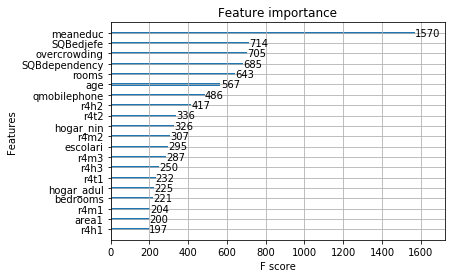

In [63]:
xgb.plot_importance(clf_xgb, max_num_features=20)
#sns.heatmap(X)